<h2>Демонстрация растекания спектра</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

num_samples = 600
sample_rate = 800

def plot_sin_func():
    x = np.linspace(0.0, num_samples / sample_rate, num_samples, endpoint=False)
    # сигнал представляет собой сумму четырех синусоид с частотами 10, 20, 50 и 100 Гц на отрезке 600 точек с ЧД 800 Гц
    sinus = np.sin(10 * 2 * np.pi * x) + 10 * np.sin(20 * 2 * np.pi * x) + 3 * np.sin(50 * 2 * np.pi * x) + 7 * np.sin(100 * 2 * np.pi * x)
    plt.plot(x, sinus)
    return sinus

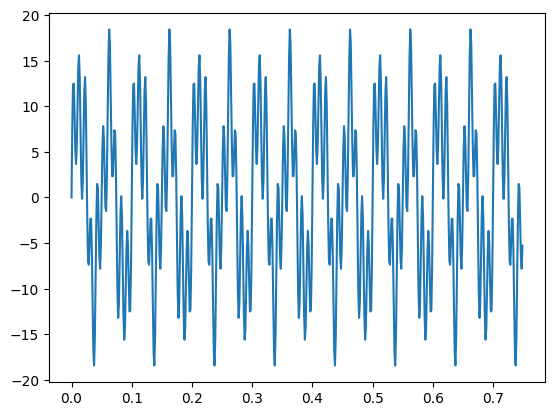

In [2]:
signal = plot_sin_func()

In [3]:
from numpy.fft import fft, fftfreq

yf = fft(signal) # комплексный спектр
xf = fftfreq(num_samples, 1 / sample_rate) # частоты, аргументы - число отсчетов и период дискретизации (в секундах)
yf_mod = np.abs(yf) # действительная часть комплексного спетктра
yf_ang = np.angle(yf) # фазовая часть комплексного спетктра

Составляющие сигнала с частотами 20 и 100 Гц уложились в окно анализа целое число раз, поэтому на графике спектра представляют собой вертикальные линии. Составляющие с частотами 10 Гц и 50 Гц "растекаются", т.к. не укладываются целое число раз в окно анализа, хотя никаких других частот в сигнале нет:

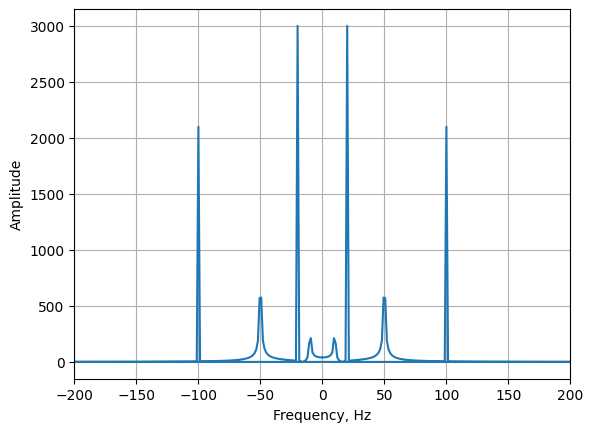

In [7]:
plt.plot(xf, yf_mod)
plt.xlabel("Frequency, Hz")
plt.ylabel("Amplitude")
plt.grid()
plt.xlim(-200, 200)
plt.show()

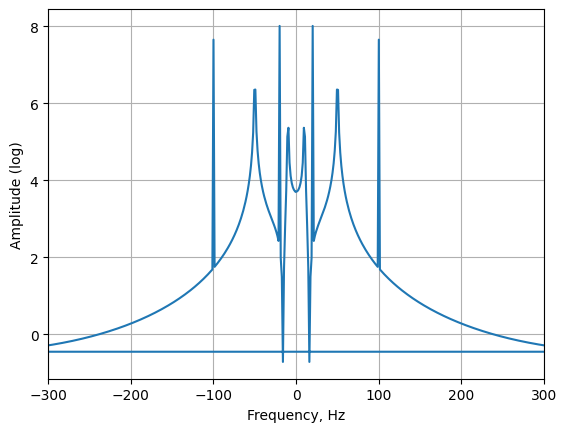

In [12]:
plt.plot(xf, np.log(yf_mod))
plt.xlabel("Frequency, Hz")
plt.ylabel("Amplitude (log)")
plt.grid()
plt.xlim(-300, 300)
plt.show()

Спектр амплитуд имеет осевую симметрию, в то время как спектр фаз - центральную:

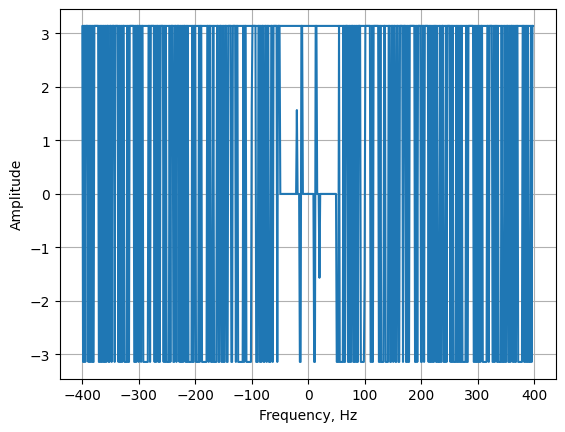

In [5]:
plt.plot(xf, yf_ang)
plt.xlabel("Frequency, Hz")
plt.ylabel("Amplitude")
plt.grid()
plt.show()